In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('data/telecom_churn.csv')

In [13]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Признаки по одному

## Количественные

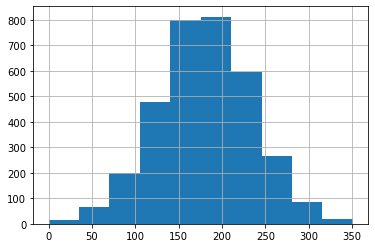

In [14]:
df['Total day minutes'].hist();

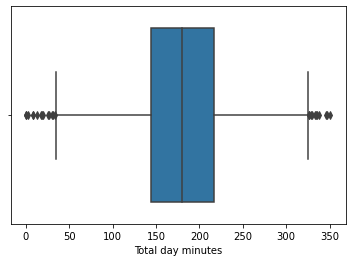

In [15]:
sns.boxplot(x=df['Total day minutes']);

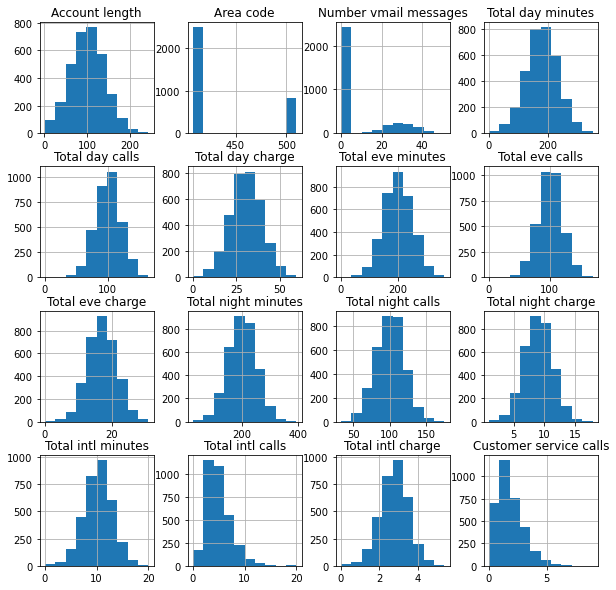

In [16]:
df.hist(figsize=[10, 10]);

## Категориальные

In [17]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [18]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

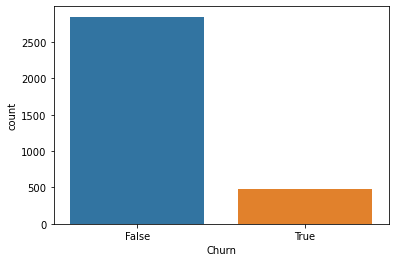

In [19]:
sns.countplot(x=df['Churn']);

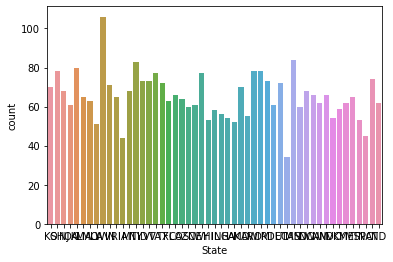

In [20]:
sns.countplot(x=df['State']);

Для самых популярных 5 штатов

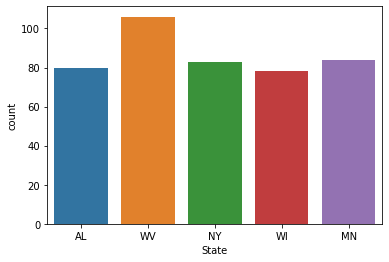

In [21]:
sns.countplot(x=df[df['State'].\
                   isin(df['State'].value_counts().head().index)]['State']);

## Взаимодействия признаков
Количество - количество 

In [22]:
feat = [f for f in df.columns if 'charge' in f]
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

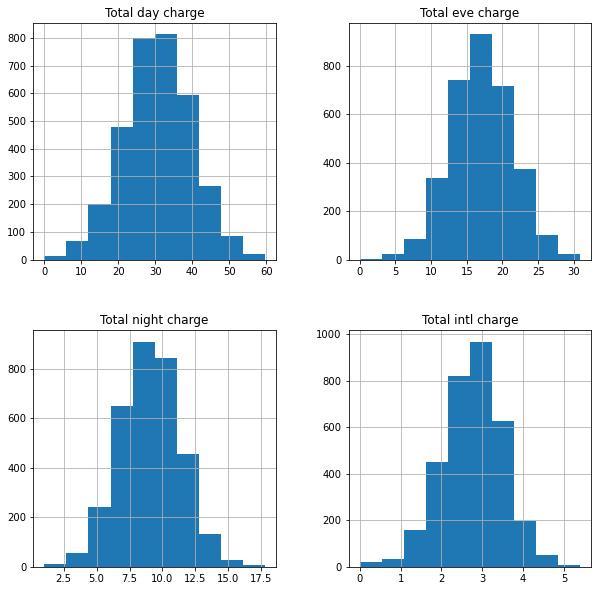

In [24]:
df[feat].hist(figsize=[10, 10]);

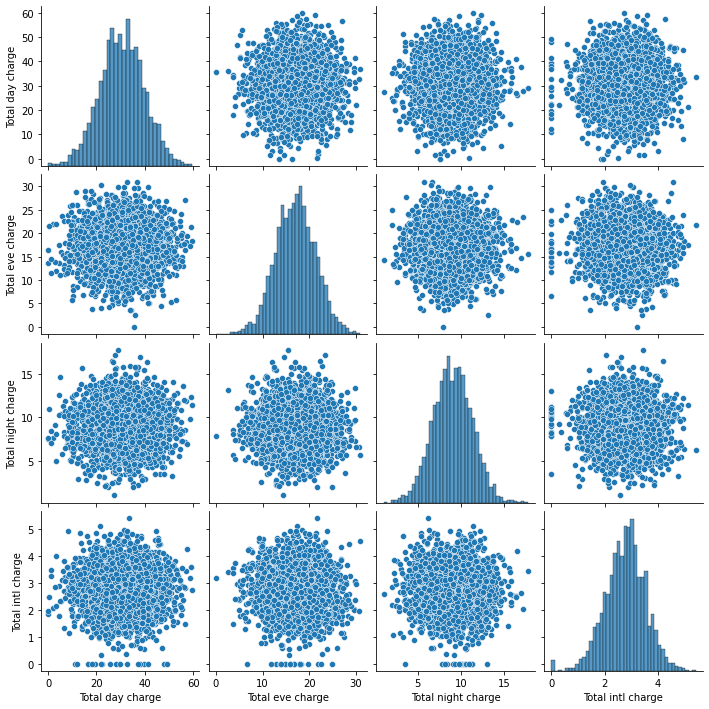

In [28]:
sns.pairplot(df[feat]);

In [38]:
df['Churn'].map({False: 'Blue', True: 'Red'})

0       Blue
1       Blue
2       Blue
3       Blue
4       Blue
        ... 
3328    Blue
3329    Blue
3330    Blue
3331    Blue
3332    Blue
Name: Churn, Length: 3333, dtype: object

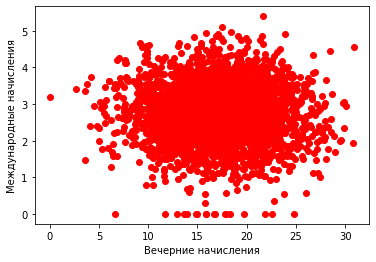

In [37]:
plt.scatter(df['Total eve charge'], df['Total intl charge'], color=df['Churn'].map({False: 'Blue', True: 'Red'}));
plt.xlabel('Вечерние начисления');
plt.ylabel('Международные начисления');
